<a href="https://colab.research.google.com/github/Faradezo/Coleta_e_Armazenamento/blob/main/trilha6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lista de imports

In [8]:
#packages
!pip install unidecode
!pip install fraction

# Load EDA Pkgs
import pandas as pd
import numpy as np
import random

# Load ML Pkgs
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('rslp')

#charts & others stuff
from unidecode import unidecode
import matplotlib.pyplot as plt
import re
import string
from fractions import Fraction

     |████████████████████████████████| 235 kB 5.4 MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [13]:
df_uol = pd.read_json('https://raw.githubusercontent.com/lucianomcsilva/articulistas/main/UolBlogs.json')
df_uol.sample()

,author,title,content
2202,Kennedy Alencar,"""Por que não tenho aprovação como ele""? Médico...","\nEm rápido pronunciamento nesta terça, o pre..."


Gosto do Reinando Azevedo, entao optei por usar os textos dele

In [10]:
df_reinaldo = df_uol[df_uol['author'] == 'Reinaldo Azevedo']
df_reinaldo.sample()

,author,title,content
3411,Reinaldo Azevedo,Brasil tem 2.673 mortes por covid em 24h e méd...,"\nNa últimas 24 horas, o Brasil registrou 2.6..."


In [21]:
#CONTAGEM DE PALAVRAS POR LINHA DE CADA ARTIGO
df_reinaldo['words'] = df_reinaldo['content'].str.split().str.len()

Funcoes de limpeza

In [17]:
stop = stopwords.words('portuguese')
# stop.append('nao')
stop2 = list()
for word in stop:
  stop2.append(unidecode(word))
stemmer = nltk.stem.RSLPStemmer()

In [19]:
# remoção de palavras de parada
df_reinaldo['content_treated'] = df_reinaldo['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Transforma em minuscula e remoção de acentos 
df_reinaldo['content_treated'] = df_reinaldo['content_treated'].str.lower().apply(lambda x: unidecode(x))

# remocação de pontuaçao
df_reinaldo['content_treated'] = df_reinaldo['content_treated'].str.replace('[{}]'.format(string.punctuation), ' ')

# remocação de numeros
df_reinaldo['content_treated'] = df_reinaldo['content_treated'].str.replace('[{}]'.format(string.digits), '')

# remoção de palavras de parada (repescagem)
df_reinaldo['content_treated'] = df_reinaldo['content_treated'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop2)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbef522e210>,
      dtype=object)

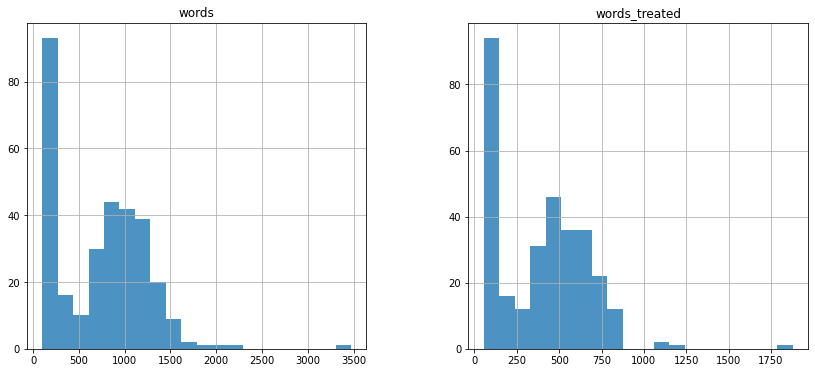

In [22]:
#Plota o DataFrame em histograma para uma avaliação
#Faz a contagem de palavras por cada linha do artigo
df_reinaldo['words_treated'] = df_reinaldo['content_treated'].str.split().str.len()
#df_aj.plot();
df_reinaldo.hist(bins=20, alpha=0.8, figsize=(14,6))
#df_aj.sample(10)

## COMENTAR ESTE A BAIXO PRA DIZER QUE SEI OQ ESTOU FAZENDO

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()
vectorizer = CountVectorizer()

#Reinaldo Azevedo
XRA = vectorizer.fit_transform(df_reinaldo['content_treated'])
vocabulary_reinaldo = vectorizer.get_feature_names()
pdXRA = pd.DataFrame(data=XRA.toarray(), columns=vocabulary_reinaldo) #.iloc[:,0::2]

#este trecho esta comendado pq é a parte do checagem se é ou nao do autor
#Reinaldo Azevedo - Verificar
#XVER = vectorizer.fit_transform(df_ver['content_treated'])
#vocabulary_ver = vectorizer.get_feature_names()
#pdXVER = pd.DataFrame(data=XVER.toarray(), columns=vocabulary_ver) #.iloc[:,0::2]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [25]:
len(vocabulary_reinaldo)
df_XRA = pdXRA.T
df_XRA['total_ra'] = df_XRA.sum(axis=1) 
#pdXAJ[['tudo', 'ser', 'hoje', 'grande', 'brasileiro', 'mundo', 'vida', 'morte', 'morrer', 'otario', 'ahh', 'anos', 'nada', 'futuro']]
pdXRA

,abag,abaixo,abalroadas,abandona,abandonado,abandonar,abandono,abandonou,abarca,abastecimento,...,zerar,zerassem,zero,zients,zimerman,zona,zorra,zufelatto,zumbi,zuniga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
306,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Reinaldo Azevedo
# Transpoe a matriz para que as palavras fiquem como linhas, e cada documento como uma linha
df_XRA = pdXRA.T

#Calcula a quantidade de vezes que cada palavra é utilizada
df_XRA['total_ra'] = df_XRA.sum(axis=1) 

#Remove as colunas individuais de cada documento para gerar a tabela
df_XRA.drop(df_XRA.columns[0:len(df_reinaldo['content'])], axis=1, inplace=True)

#Ordena o resultado final
df_XRA = df_XRA.sort_values(by='total_ra', ascending=False)

#Gera a tabela
df_XRA.head(50)

,total_ra
bolsonaro,1287
presidente,938
ser,695
ainda,501
contra,419
supremo,418
ministro,410
governo,407
caso,387
pode,367


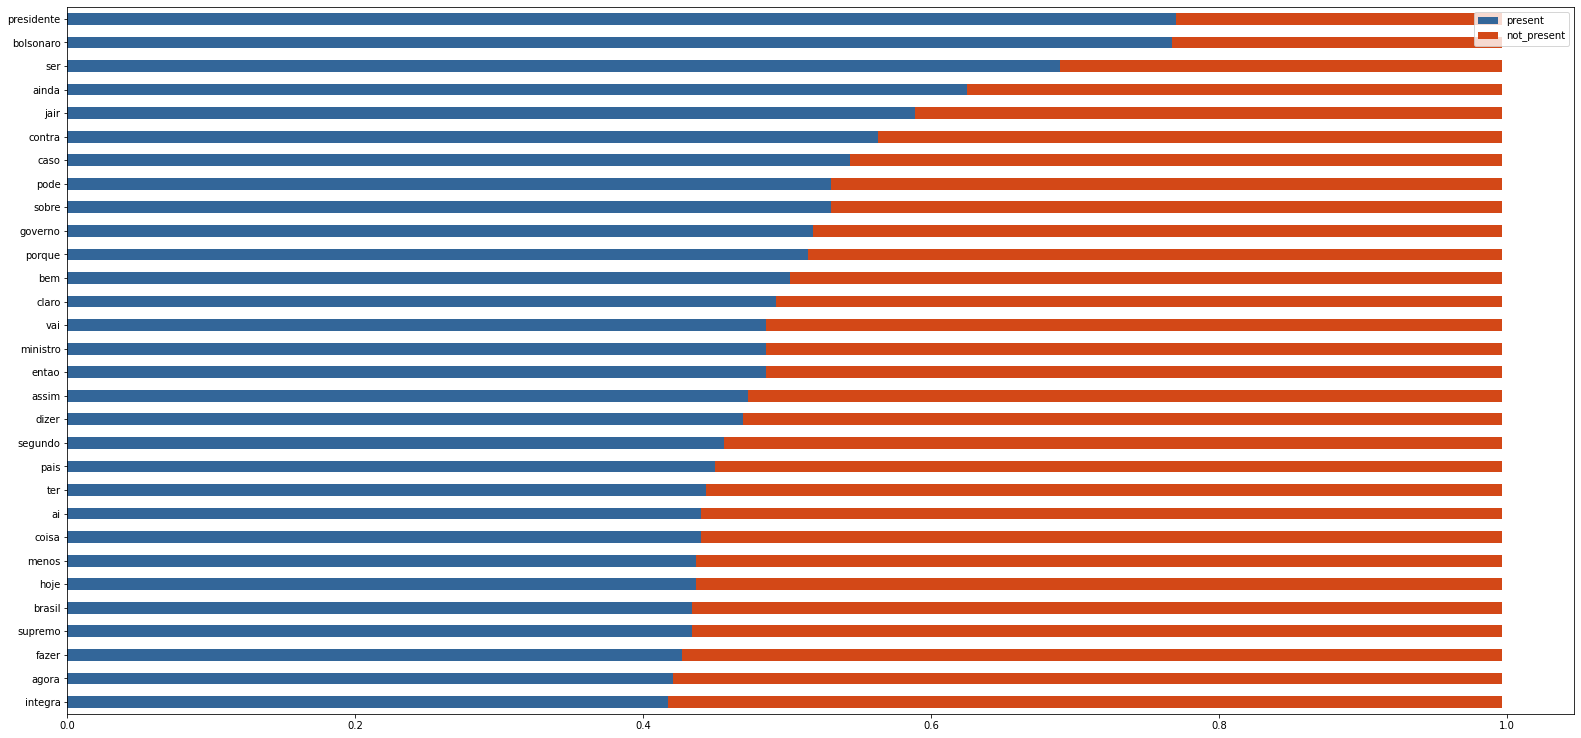

In [29]:
# Transpoe a matriz para que as palavras fiquem como linhas, e cada documento como uma linha
pdXRAT = pdXRA.T

#Calcula a quantidade de documentos que aquela palavra entrou ou nao entrou
pdXRAT['present'] = (pdXRAT.ne(0).sum(axis=1) -1) / len(df_reinaldo['content'])
pdXRAT['not_present'] = pdXRAT.eq(0).sum(axis=1) / len(df_reinaldo['content'])

#REmove as colunas individuais de cada documento para gerar o grafico
pdXRAT.drop(pdXRAT.columns[0:len(df_reinaldo['content'])], axis=1, inplace=True)

#Ordena o resultado final
pdXRAT = pdXRAT.sort_values(by='present', ascending=True)

#Gera o gráfico contendo as 30 palavras mais usadas
pdXRAT.tail(30).plot.barh(stacked=True, color=['#336699', '#D34817'], figsize=(27,13))

In [30]:
pdXRAT.tail(30)

,present,not_present
integra,0.417476,0.579288
agora,0.420712,0.576052
fazer,0.427184,0.569579
supremo,0.433657,0.563107
brasil,0.433657,0.563107
hoje,0.436893,0.559871
menos,0.436893,0.559871
coisa,0.440129,0.556634
ai,0.440129,0.556634
ter,0.443366,0.553398


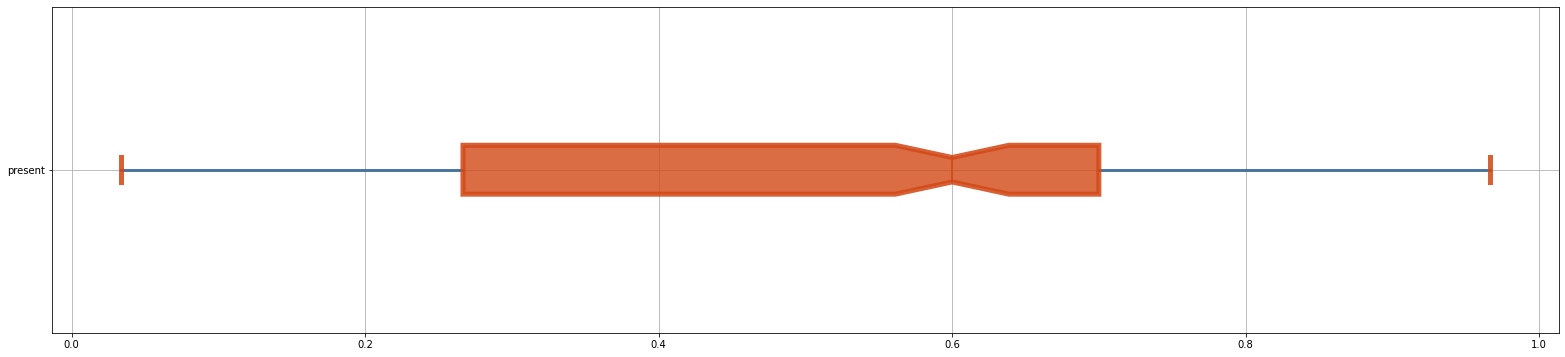

In [31]:
#Reinicia a matriz transposta
pdXRAT = pdXRA.T

#Recalcula tudo (para evitar problemas como ordem de exceução das celulas)
pdXRAT['present'] = (pdXRAT.ne(0).sum(axis=1) -1) / len(df_reinaldo['content'])
pdXRAT = pdXRAT.sort_values(by='present', ascending=False)
pdXRAT.drop('present', axis=1, inplace=True)

#Cria uma lista com as 30 palavras mais utilizadas
most_commons = list(pdXRAT.head(30).index.array)

#Filtra as 30 palavras e Traspoe novamente
pdXRAT = pdXRAT.filter(items=most_commons, axis=0).T

# Cria novas colunas com o percentual das 30 palavras mais utilizadas
# presentes em cada corpus
pdXRAT['present'] = (pdXRAT.ne(0).sum(axis=1)) / 30

#Remove as colunas individuais de cada palavra para gerar o grafico
pdXRAT.drop(pdXRAT.columns[0:30], axis=1, inplace=True)

#Gera o gráfico de boxplor 
pdXRAT.boxplot(vert=False, figsize=(27,6), notch=True, patch_artist=True,  # fill with color               
               boxprops=dict(linestyle='-', linewidth=5, color='#D34817DD', facecolor='#D34817CC'),
               medianprops=dict(linestyle='-', linewidth=2,  color='#D34817DD'),
               whiskerprops=dict(linestyle='-', linewidth=3, color='#336699DD'),
               capprops=dict(linestyle='-', linewidth=5,  color='#D34817DD')               
)
